In [2]:
import numpy as np
import pandas as pd
# Import the dataset
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


1. CRIM per capital crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centers
9. RAD index of accessibility to radial highways
10.TAX full-value property-tax rate per 10,000 USD
11. PTRATIO pupil-teacher ratio by town
12. Black 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
13. LSTAT % lower status of the population

# Data Preprocessing

In [5]:
# Shape of dataset
print('Shape of Training dataset:', df.shape)

Shape of Training dataset: (506, 14)


In [6]:
# Checking null values for training dataset
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# change ‘medv’ column name to ‘Price’
df.rename(columns={'MEDV':'Price'}, inplace=True)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# Exploratory Data Analysis

In [13]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  Price    394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Feature Observation

In [15]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

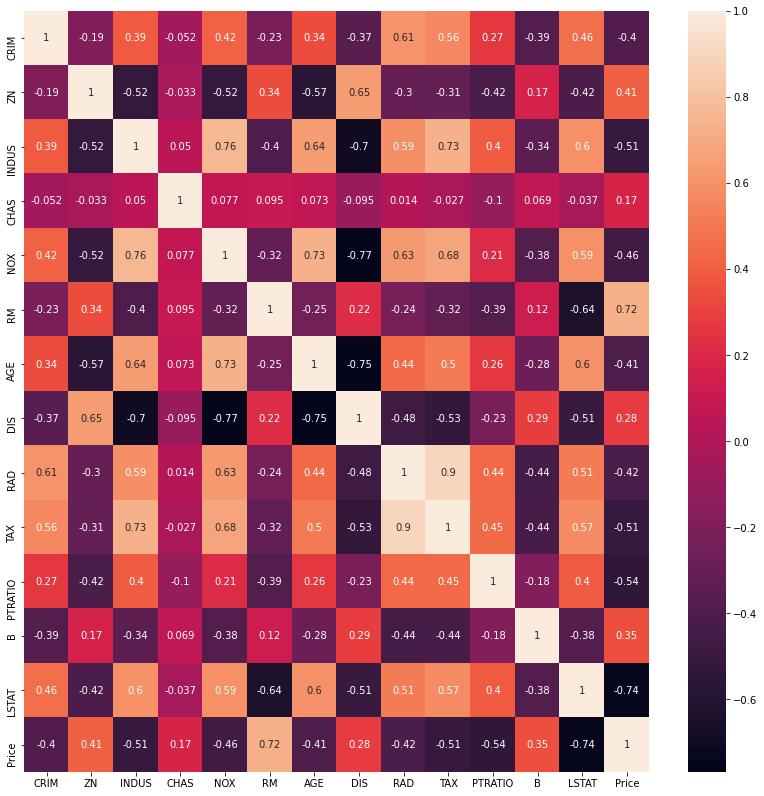

In [86]:
# Plotting the heatmap of correlation between features

import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

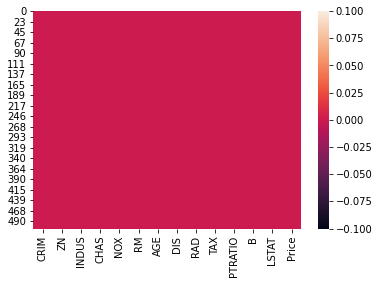

In [18]:
# Checking the null values using heatmap
sns.heatmap(df.isnull())

In [19]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [21]:
y = np.round(df['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5044.573637
1,ZN,5880.118440
2,INDUS,703.365351
3,CHAS,50.407501
4,NOX,3.883311
5,RM,18.075884
6,AGE,1896.265363
7,DIS,132.055576
8,RAD,1163.745035
9,TAX,12242.485632


In [22]:
print(featureScores.nlargest(5,'Score')) #print 5 best features

   Specs         Score
9    TAX  12242.485632
1     ZN   5880.118440
0   CRIM   5044.573637
11     B   2709.416310
6    AGE   1896.265363


In [109]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_train)

In [92]:
print("training accuracy", model.score(X_train,y_train)*100)

training accuracy 79.79961473127297


In [93]:
print("testing accuracy", model.score(X_test,y_test)*100)

testing accuracy 58.065631230158054


In [94]:
from sklearn.metrics import mean_squared_error, r2_score
print("Model accuracy:", r2_score(y, model.predict(X))*100)

Model accuracy: 76.23433302562489


In [95]:
mean_squared_error(y_train, y_pred, squared=False)

4.189354714711248

In [96]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred) 

0.7979961473127296

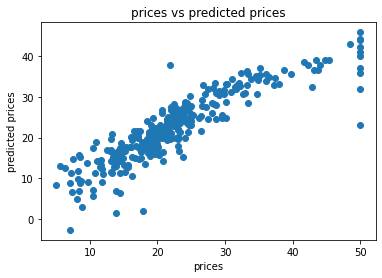

In [97]:
plt.scatter(y_train, y_pred)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

In [98]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [100]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
y_pred =  reg.predict(X_train)

In [102]:
print("training accuracy:", reg.score(X_train,y_train)*100)

training accuracy: 97.92928625925805


In [103]:
print("testing accuracy:", reg.score(X_test,y_test)*100)

testing accuracy: 83.61007658821494


In [104]:
mean_squared_error(y_train, y_pred, squared=False)

1.3413043722614268

In [106]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred) 

0.9792928625925805

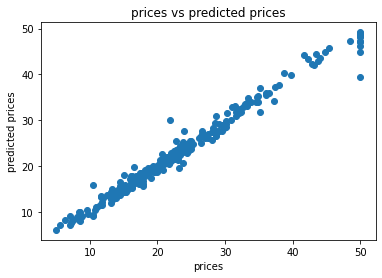

In [107]:
plt.scatter(y_train, y_pred)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

In [ ]:
SOLUTION

# LINEAR REGRESSION

training accuracy 79.79961473127297

testing accuracy 58.065631230158054

RMSE 4.189354714711248

R2 0.7979961473127296


# RANDOM FOREST

training accuracy: 97.92928625925805
    
testing accuracy: 83.61007658821494 
    
RSME 1.3413043722614268

R2 0.9792928625925805

In [ ]:

X1 = df.iloc[:,[0,3,4,5,7,10,8,11,12]]
print(X1)